**Expression Level Analysis & K-Means Clustering - GSE123468**

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/GSE123468_12_16_gene_counts.csv.gz')
print(data.head())
print(data.describe())
print(data.columns)

   Unnamed: 0           Geneid                    Chr  \
0           1  ENSG00000223972                1;1;1;1   
1           2  ENSG00000227232  1;1;1;1;1;1;1;1;1;1;1   
2           3  ENSG00000278267                      1   
3           4  ENSG00000243485                  1;1;1   
4           5  ENSG00000237613                  1;1;1   

                                               Start  \
0                            11869;12613;12975;13221   
1  14404;15005;15796;16607;16858;17233;17606;1791...   
2                                              17369   
3                                  29554;30267;30976   
4                                  34554;35245;35721   

                                                 End                 Strand  \
0                            12227;12721;13052;14409                +;+;+;+   
1  14501;15038;15947;16765;17055;17368;17742;1806...  -;-;-;-;-;-;-;-;-;-;-   
2                                              17436                      -   
3   

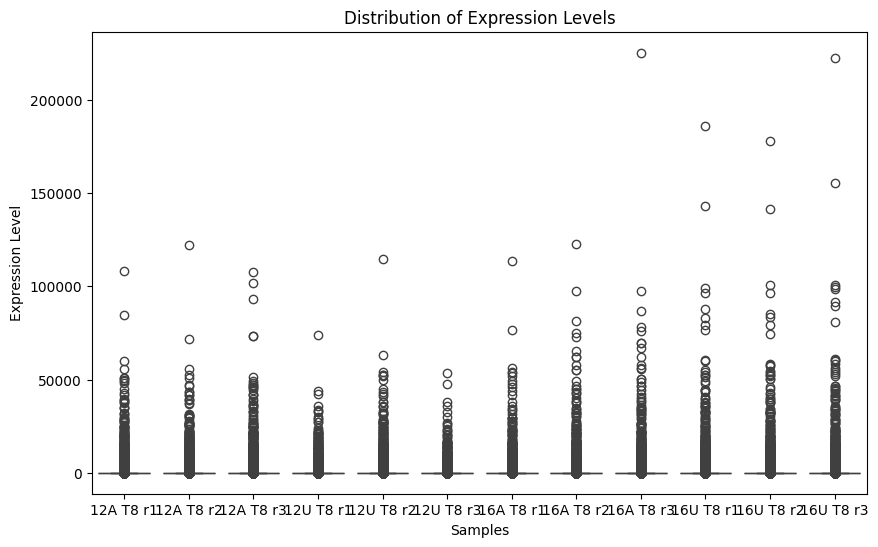

In [ ]:
if 'Length' in data.columns:
    data = data.drop(['Length'], axis=1)
elif 'Length' in data.index:
    data = data.drop(['Length'], axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 6:])
plt.title('Distribution of Expression Levels')
plt.xlabel('Samples')
plt.ylabel('Expression Level')
plt.show()

In [ ]:
#normalize data
data_log = np.log1p(data.iloc[:, 6:])

In [ ]:
#k-means
data_log_T = data_log.T
data_log_T.columns = data_log_T.columns.astype(str)
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_log_T)
clusters = kmeans.labels_

#add the info
data_log = data_log.T #transpose data frame
data_log['Cluster'] = clusters

cluster_means = data_log.groupby('Cluster').mean()
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         0         1         2      3      4      5      6      7      \
Cluster                                                                 
0          0.0  1.155245  1.364782    0.0    0.0    0.0    0.0    0.0   
1          0.0  1.493133  1.727618    0.0    0.0    0.0    0.0    0.0   
2          0.0  0.828302  1.229626    0.0    0.0    0.0    0.0    0.0   

            8      9      ...  58041  58042  58043  58044  58045     58046  \
Cluster                   ...                                                
0        0.231049    0.0  ...    0.0    0.0    0.0    0.0    0.0  3.718216   
1        0.000000    0.0  ...    0.0    0.0    0.0    0.0    0.0  3.051125   
2        0.000000    0.0  ...    0.0    0.0    0.0    0.0    0.0  3.914573   

            58047  58048  58049  58050  
Cluster                                 
0        3.694560    0.0    0.0    0.0  
1        3.850437    0.0    0.0    0.0  
2        4.115423    0.0    0.0    0.0  

[3 rows x 58051 columns]


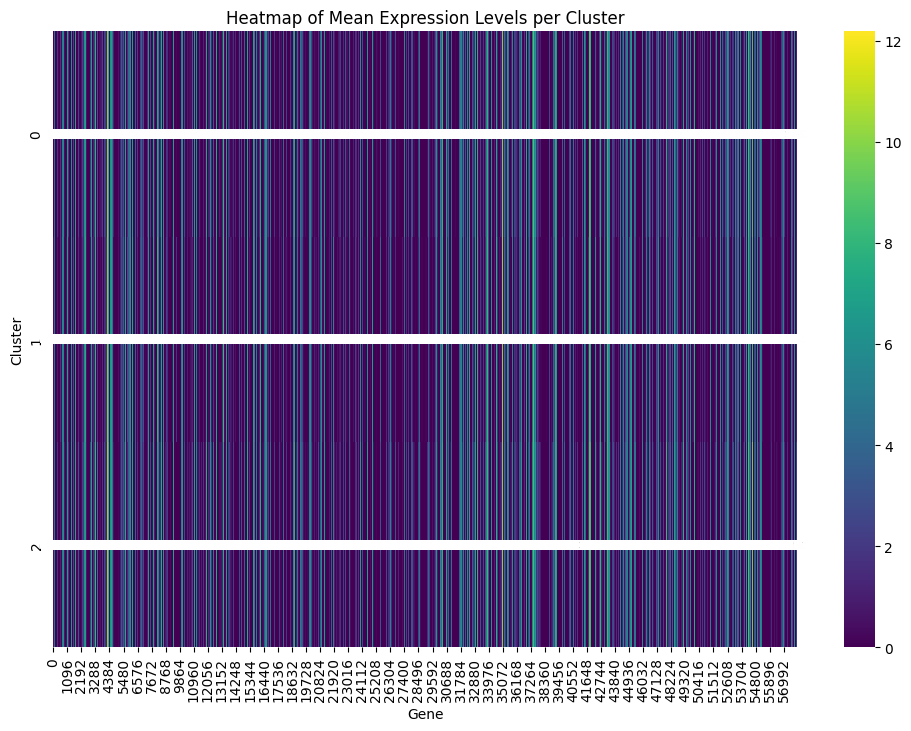

In [ ]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='viridis', annot=True)
plt.title('Heatmap of Mean Expression Levels per Cluster')
plt.xlabel('Gene')
plt.ylabel('Cluster')
plt.show()

**Simple Autoeconder Trial - trying to capture non-linear relationships w t-SNE and map out genes in eahc cluster!!**

In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#handle missing values before scaling
data_filled = data.apply(pd.to_numeric, errors='coerce').fillna(data.apply(pd.to_numeric, errors='coerce').mean())

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_filled)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled_df.head())

   Unnamed: 0  Geneid       Chr     Start       End  Strand  12A T8 r1  \
0    0.000000     NaN  0.404692  0.301374  0.301377     NaN   0.000000   
1    0.000017     NaN  0.404692  0.301374  0.301377     NaN   0.000018   
2    0.000034     NaN  0.000000  0.000067  0.000067     NaN   0.000055   
3    0.000052     NaN  0.404692  0.301374  0.301377     NaN   0.000000   
4    0.000069     NaN  0.404692  0.301374  0.301377     NaN   0.000000   

   12A T8 r2  12A T8 r3  12U T8 r1  12U T8 r2  12U T8 r3  16A T8 r1  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1   0.000057   0.000046   0.000027   0.000044   0.000038   0.000009   
2   0.000041   0.000056   0.000068   0.000017   0.000094   0.000035   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

   16A T8 r2  16A T8 r3  16U T8 r1  16U T8 r2  16U T8 r3  
0   0.000000   0.000000   0.000000   0.000000   0.000000  
1   0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
#input: take gene expression levels in
input_data = Input(shape=(data_scaled_df.shape[1],))
#autoencoder: compress gene expression levels into smaller representation in latent space
encoded = Dense(32, activation='relu')(input_data)
decoded = Dense(data_scaled_df.shape[1], activation='sigmoid')(encoded) #decoder: reconstructs gene expression from compressed form
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #loss: difference between original gene expression and reconstructed data

#fit model
autoencoder.fit(data_scaled_df, data_scaled_df,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

encoder = Model(input_data, encoded)

Epoch 1/50
182/182 [==============================] - 2s 6ms/step - loss: 0.4926 - val_loss: 0.1736
Epoch 2/50
182/182 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.0663
Epoch 3/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0771 - val_loss: 0.0520
Epoch 4/50
182/182 [==============================] - 1s 3ms/step - loss: 0.0639 - val_loss: 0.0395
Epoch 5/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0346
Epoch 6/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0342
Epoch 7/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0341
Epoch 8/50
182/182 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.0340
Epoch 9/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0338
Epoch 10/50
182/182 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0335

In [ ]:
encoded_data = encoder.predict(data_scaled_df)

1815/1815 [==============================] - 2s 1ms/step


In [ ]:
#t-SNE applied to latent space representation - technically clearer results + computationally manageable
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(encoded_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 58051 samples in 0.001s...
[t-SNE] Computed neighbors for 58051 samples in 87.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 58051
[t-SNE] Computed conditional probabilities for sample 2000 / 58051
[t-SNE] Computed conditional probabilities for sample 3000 / 58051
[t-SNE] Computed conditional probabilities for sample 4000 / 58051
[t-SNE] Computed conditional probabilities for sample 5000 / 58051
[t-SNE] Computed conditional probabilities for sample 6000 / 58051
[t-SNE] Computed conditional probabilities for sample 7000 / 58051
[t-SNE] Computed conditional probabilities for sample 8000 / 58051
[t-SNE] Computed conditional probabilities for sample 9000 / 58051
[t-SNE] Computed conditional probabilities for sample 10000 / 58051
[t-SNE] Computed conditional probabilities for sample 11000 / 58051
[t-SNE] Computed conditional probabilities for sample 12000 / 58051
[t-SNE] Computed conditional probabilities for s

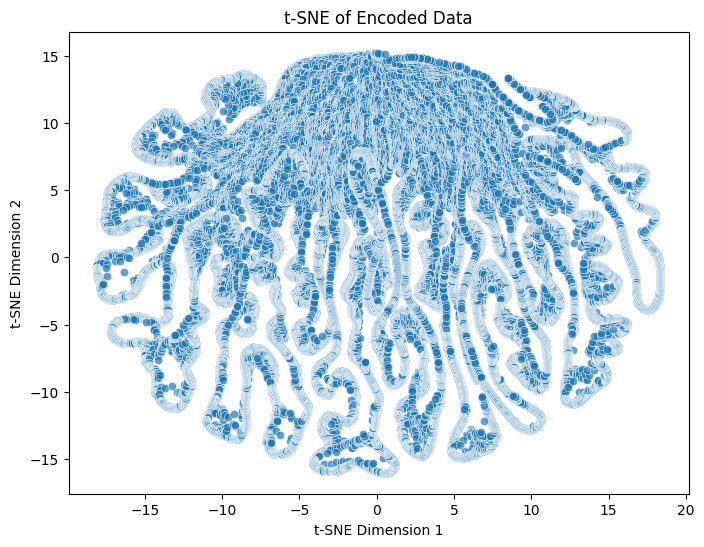

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Encoded Data')
plt.show()

In [ ]:
#k-means on the t-SNE results
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(tsne_results)

data['Cluster'] = clusters

#cluster 1 genes
cluster1_genes = data[data['Cluster'] == 0]
print(cluster1_genes)

#cluster 2 genes
cluster2_genes = data[data['Cluster'] == 1]
print(cluster2_genes)

#cluster 3 genes
cluster3_genes = data[data['Cluster'] == 2]
print(cluster3_genes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Unnamed: 0           Geneid  \
0               1  ENSG00000223972   
1               2  ENSG00000227232   
2               3  ENSG00000278267   
3               4  ENSG00000243485   
4               5  ENSG00000237613   
...           ...              ...   
57891       57892  ENSG00000183255   
57927       57928  ENSG00000142156   
57933       57934  ENSG00000142173   
57970       57971  ENSG00000198804   
57977       57978  ENSG00000198938   

                                                     Chr  \
0                                                1;1;1;1   
1                                  1;1;1;1;1;1;1;1;1;1;1   
2                                                      1   
3                                                  1;1;1   
4                                                  1;1;1   
...                                                  ...   
57891                         21;21;21;21;21;21;21;21;21   
57927  21;21;21;21;21;21;21;21;21;21;21;21;21;21;21;2...   
579

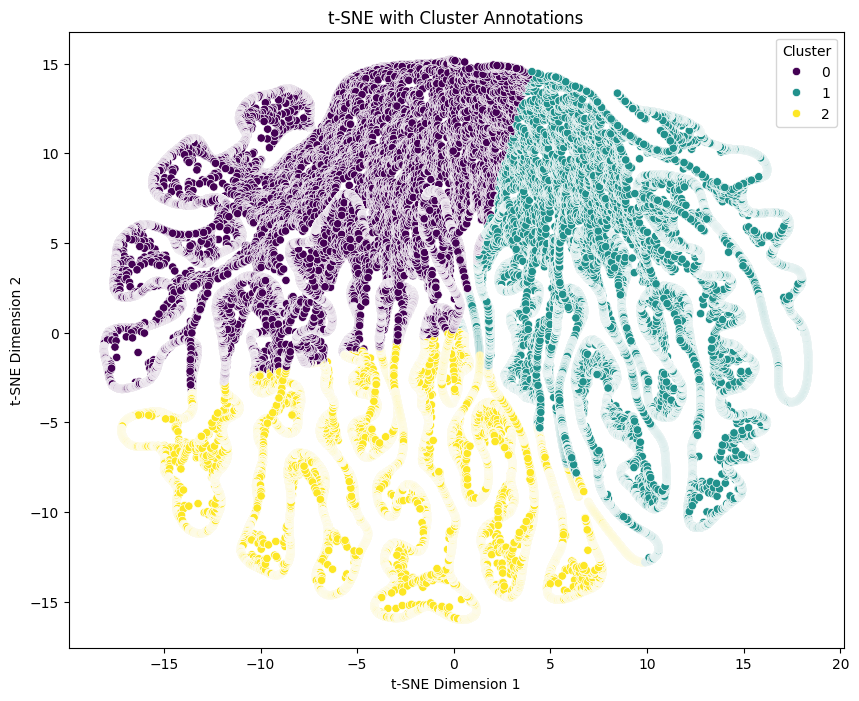

In [ ]:
data['t-SNE Dimension 1'] = tsne_results[:, 0]
data['t-SNE Dimension 2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Dimension 1', y='t-SNE Dimension 2', hue='Cluster', data=data, palette='viridis')
plt.title('t-SNE showing Clusters')
plt.show()

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Geneid', 'Chr', 'Start', 'End', 'Strand', '12A T8 r1',
       '12A T8 r2', '12A T8 r3', '12U T8 r1', '12U T8 r2', '12U T8 r3',
       '16A T8 r1', '16A T8 r2', '16A T8 r3', '16U T8 r1', '16U T8 r2',
       '16U T8 r3', 'Cluster', 't-SNE Dimension 1', 't-SNE Dimension 2'],
      dtype='object')


In [ ]:
#mean expression for each gene
columns_for_mean = ['12A T8 r1', '12A T8 r2', '12A T8 r3', '12U T8 r1', '12U T8 r2', '12U T8 r3',
                    '16A T8 r1', '16A T8 r2', '16A T8 r3', '16U T8 r1', '16U T8 r2', '16U T8 r3']
data['mean_expression'] = data[columns_for_mean].mean(axis=1)
clusters = data['Cluster'].unique()
high_expr_genes = {cluster: pd.DataFrame() for cluster in clusters}

for cluster in clusters:
    cluster_data = data[data['Cluster'] == cluster]
    mean_expression = cluster_data['mean_expression'].mean()
    high_expr_genes[cluster] = cluster_data[cluster_data['mean_expression'] > mean_expression]

for cluster, genes in high_expr_genes.items():
    print(f"Cluster {cluster} high expression genes:")
    print(genes[['Geneid', 'mean_expression']])


Cluster 0 high expression genes:
                Geneid  mean_expression
71     ENSG00000188157       661.666667
86     ENSG00000078808      1131.166667
87     ENSG00000176022       917.833333
93     ENSG00000131584       822.083333
100    ENSG00000107404       761.416667
...                ...              ...
57891  ENSG00000183255      9448.000000
57927  ENSG00000142156      5177.833333
57933  ENSG00000142173      5857.750000
57970  ENSG00000198804      6783.333333
57977  ENSG00000198938      7770.500000

[3700 rows x 2 columns]
Cluster 2 high expression genes:
                Geneid  mean_expression
6165   ENSG00000231609         3.833333
6182   ENSG00000251775         4.750000
6198   ENSG00000260101         7.083333
6205   ENSG00000226756         9.166667
6215   ENSG00000232613         5.583333
...                ...              ...
40091  ENSG00000199436         3.416667
40092  ENSG00000200785         3.500000
40095  ENSG00000274475         4.166667
40162  ENSG00000277734       

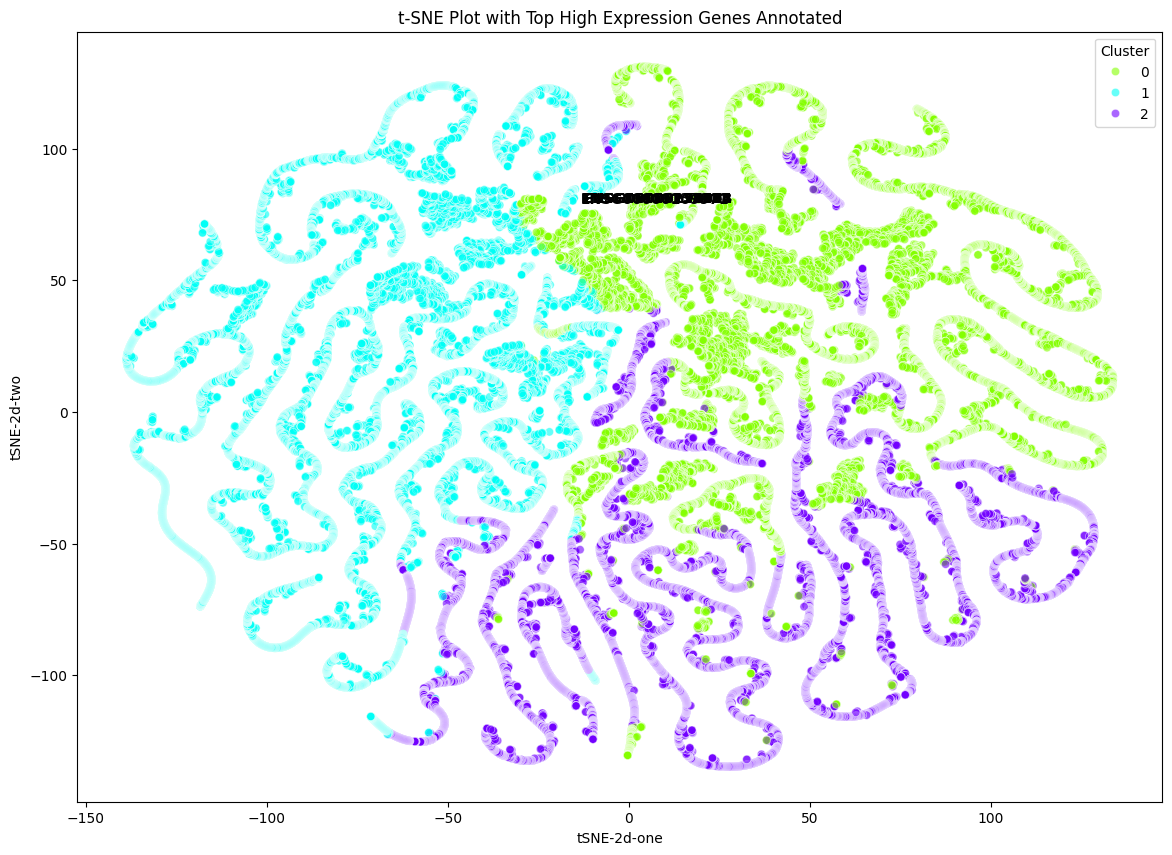

In [ ]:
top_genes = data.nlargest(10, 'mean_expression')

plt.figure(figsize=(14, 10))
palette = sns.color_palette("hsv", len(data['Cluster'].unique()))
scatter = sns.scatterplot(
    x="tSNE-2d-one", y="tSNE-2d-two",
    hue="Cluster",
    data=data,
    palette=palette,
    alpha=0.6
)

#annotate the genes
for i, row in top_genes.iterrows():
    plt.text(row['tSNE-2d-one'], row['tSNE-2d-two'], row['Geneid'],
             horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.title('t-SNE Plot with Top High Expression Genes Annotated')
plt.legend(title='Cluster')
plt.show()

In [ ]:
print("Top High Expression Genes:")
print(top_genes[['Geneid', 'mean_expression']])

Top High Expression Genes:
                Geneid  mean_expression
31932  ENSG00000251562    117097.166667
3319   ENSG00000132688    104966.916667
42647  ENSG00000159251     69662.666667
1184   ENSG00000127603     59645.916667
42715  ENSG00000137801     58118.750000
8739   ENSG00000175084     57396.083333
7907   ENSG00000239474     56202.583333
13792  ENSG00000172403     53911.250000
18960  ENSG00000151914     53438.750000
33213  ENSG00000109971     45625.750000


**Final Troubleshoot with the name overlap**

In [ ]:
!pip install adjustText
from adjustText import adjust_text

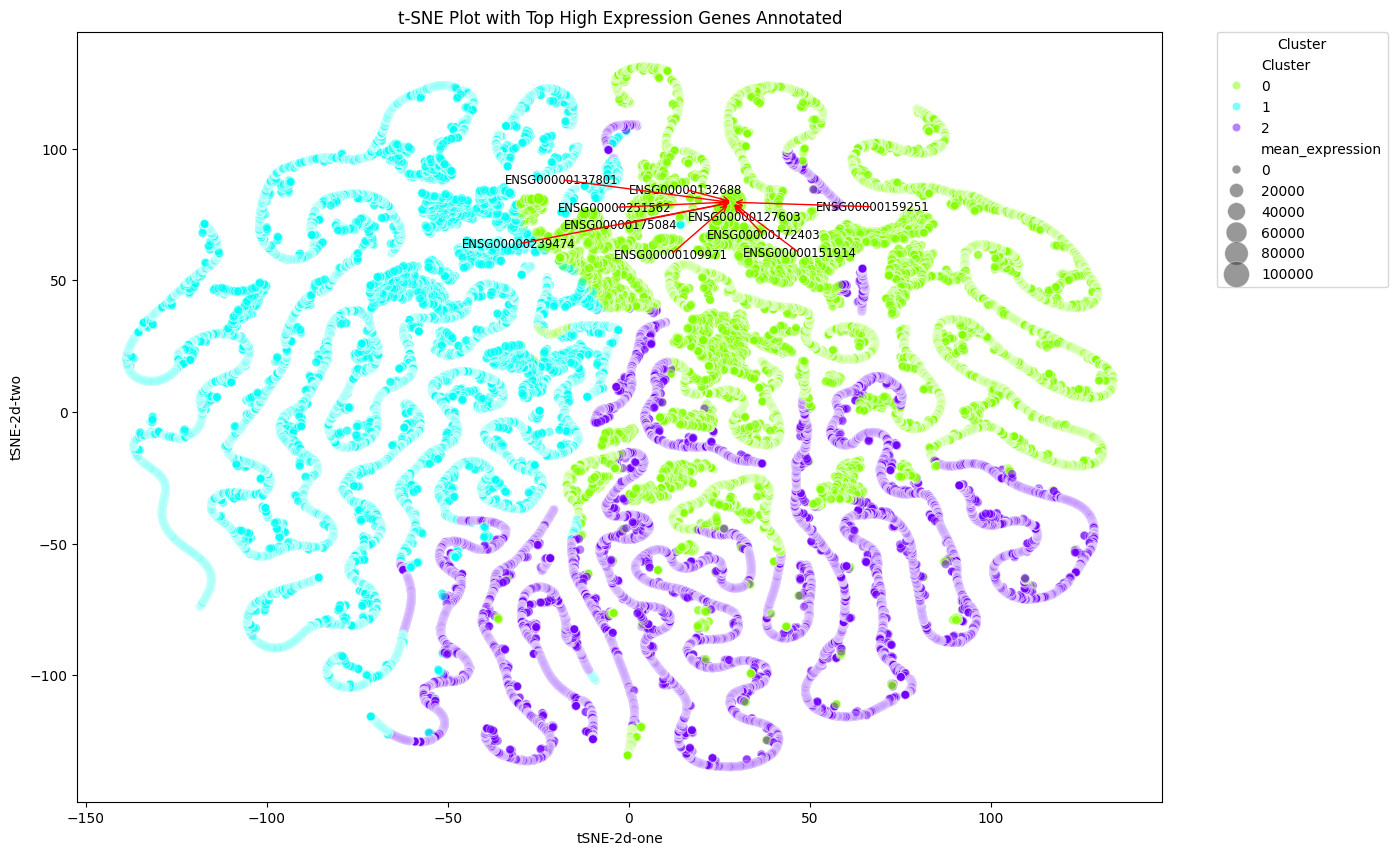

In [ ]:
plt.figure(figsize=(14, 10))
palette = sns.color_palette("hsv", len(data['Cluster'].unique()))
scatter = sns.scatterplot(
    x="tSNE-2d-one", y="tSNE-2d-two",
    hue="Cluster",
    size="mean_expression",
    sizes=(40, 400),
    alpha=0.5,
    palette=palette,
    data=data
)

texts = []
for i, row in top_genes.iterrows():
    texts.append(plt.text(row['tSNE-2d-one'], row['tSNE-2d-two'], row['Geneid'],
                          ha='right', va='top', color='black', size='small'))

#adjust to avoid the overlap!
adjust_text(texts,
            expand_points=(1.2, 1.5),
            arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE Plot with Top High Expression Genes Annotated')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

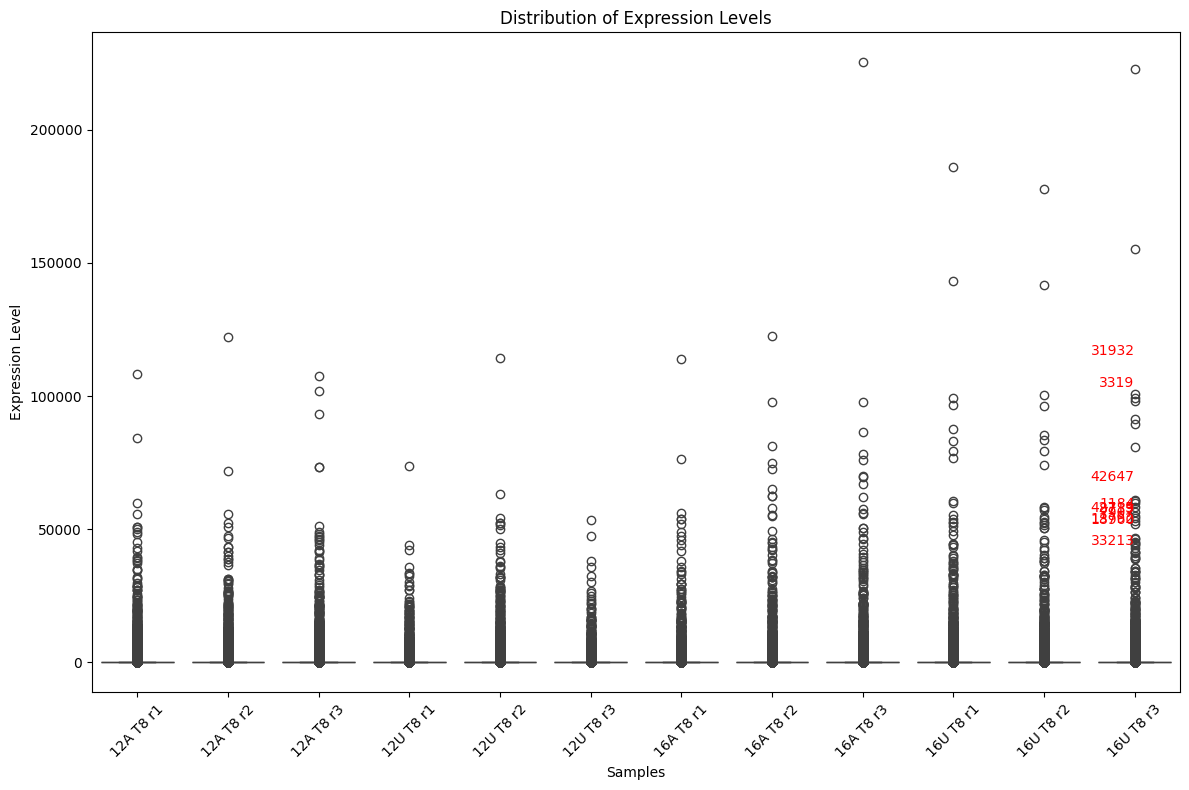

In [ ]:
columns_to_drop = ['Length', 'Unnamed: 0', 'Geneid', 'Chr', 'Start', 'End', 'Strand']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data['Mean_Expression'] = data['Mean_Expression'].astype(float)

plt.figure(figsize=(12, 8))
expression_data = data.drop('Mean_Expression', axis=1)
boxplot = sns.boxplot(data=expression_data)
plt.title('Distribution of Expression Levels')
plt.xlabel('Samples')
plt.ylabel('Expression Level')

#annotate the genes
for idx, row in top_genes.iterrows():
    y_position = row['Mean_Expression']
    plt.text(expression_data.shape[1] - 1, y_position, row.name,
             horizontalalignment='right', verticalalignment='center', color='red', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(top_genes)

       12A T8 r1  12A T8 r2  12A T8 r3  12U T8 r1  12U T8 r2  12U T8 r3  \
31932      59761      52220      93312      43986      54228      53277   
3319      108381     122084     101746      73752     114489      38129   
42647      55663      55877      73354      33233      50002      35940   
1184       50763      43239      73463      35730      43222      32426   
42715      84387      71793     107553      42159      63368      47455   
8739       39277      37497      41510      29001      42005      22928   
7907       49911      47318      51292      32526      52477      24947   
13792      34522      31427      42298      21861      31533      20353   
18960      31992      26058      49006      27051      31940      26189   
33213      50821      46620      48175      33445      52201      23712   

       16A T8 r1  16A T8 r2  16A T8 r3  16U T8 r1  16U T8 r2  16U T8 r3  \
31932     113817     122530     225365     186085     177806     222779   
3319       76424      97